## Aula 04: Detecção de Anomalias #01

## Hoje

- Interpretação
- Categorizações (01 e 02)
- Detecção de anomalias usando resíduos e limiares

### Interpretação

Anomalias podem ser interpretadas como:

- **amostras indesejadas**: pontos oriundos de algum erro de natureza determínistica ou não, seja uma simples falha de aquisição/registro da amostra ou influência externa de outras variáveis ou fenônemos fora do controle.
- **evento especial**: a amostra representa um evento que merece ser analisado por se tratar de um caso particular do fenômeno em si que se manifesta em ocasições excepcionais. Talvez o exemplo mais comum seja comportamentos de compra inesperados que possam identificar uma fraude de cartão de crédito.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set()
plt.rcParams["figure.figsize"] = (15, 8)

In [3]:
df = pd.read_csv("data/serie_de_mentirinha.csv")
data = np.array(df["data"])

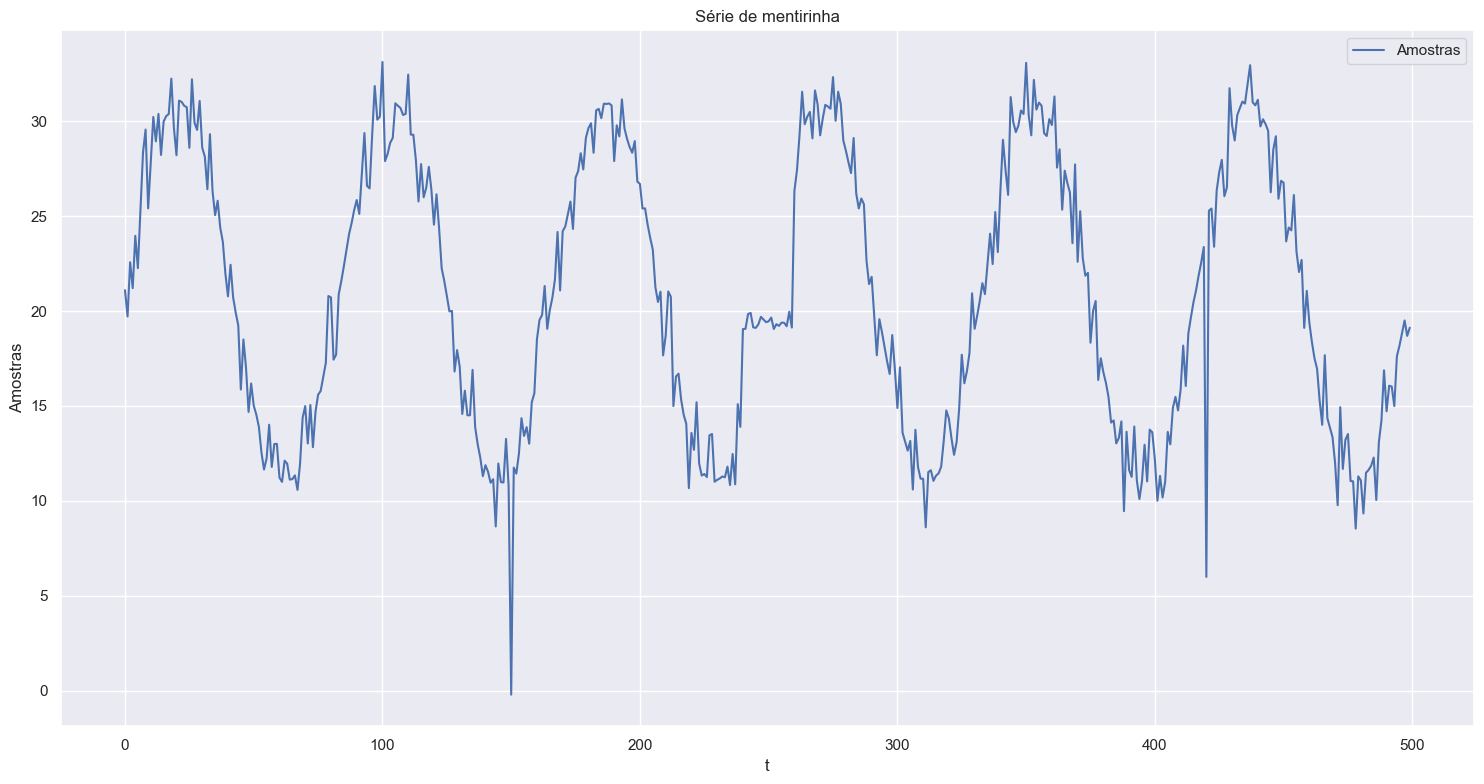

In [4]:
plt.plot(data, label="Amostras")
plt.title("Série de mentirinha")
plt.xlabel("t")
plt.ylabel("Amostras")
plt.legend()
plt.tight_layout()
plt.show()

### Categorização 01

Quanto à magnitude da amostra em relação à série completa ou à vizinhança próxima do ponto, a anomalia pode ser:

- **local**: o valor da amostra representa um desvio estranho com relação à região onde ele aconteceu, sem gerar confusão quanto à tendência e/ou sazonalidade geral.
- **global**: o valor da amostra é muito descrepante com relação magnitude (muito algo ou muito baixo do esperado), além de representar uma quebra e expectativa de tendênica e/ou sazonalidade.

### Categorização 02

Quanto à quantidade de anomalias e uma posível relação sequencial, podemos tipificar os eventos como:

- **pontuais**: anomalias isoladas com relação à vizinhança.
- **sequenciais**: conjunto ordenado de mais de uma anomalia respeitando o mesmo padrão especial.

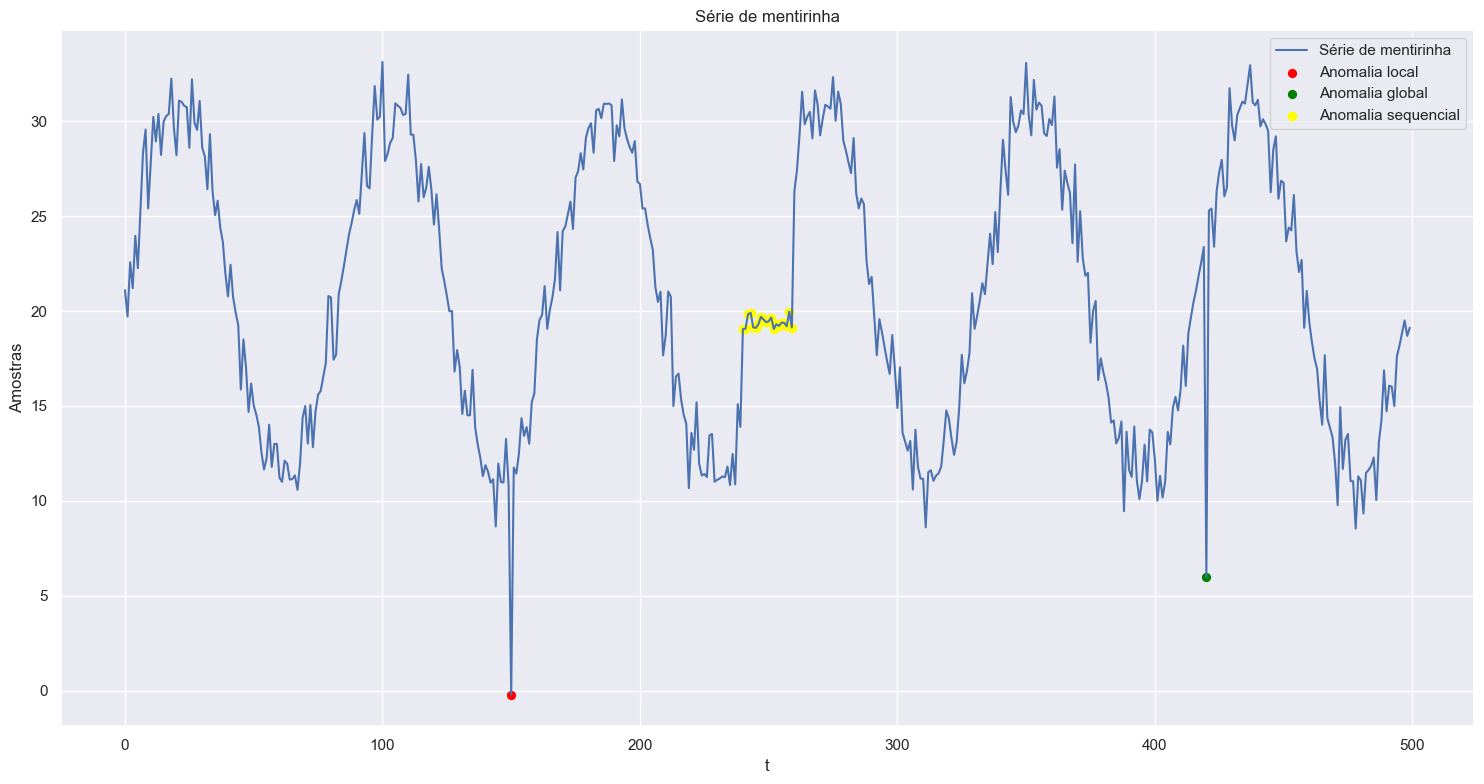

In [5]:
plt.plot(data, label="Série de mentirinha")
plt.scatter(150, -0.2, color="red", s=32, label="Anomalia local")
plt.scatter(420, 6, color="green", s=32, label="Anomalia global")
plt.scatter(range(240, 260), data[240:260], label="Anomalia sequencial", color="yellow")
plt.title("Série de mentirinha")
plt.xlabel("t")
plt.ylabel("Amostras")
plt.legend()
plt.tight_layout()
plt.show()

### Detecção de anomalias usando resíduos e limiares

> Analisar o resíduo extraído a partir de uma decomposição sazonal e classificar eventos com a ajuda de um valor limiar estabelecido.

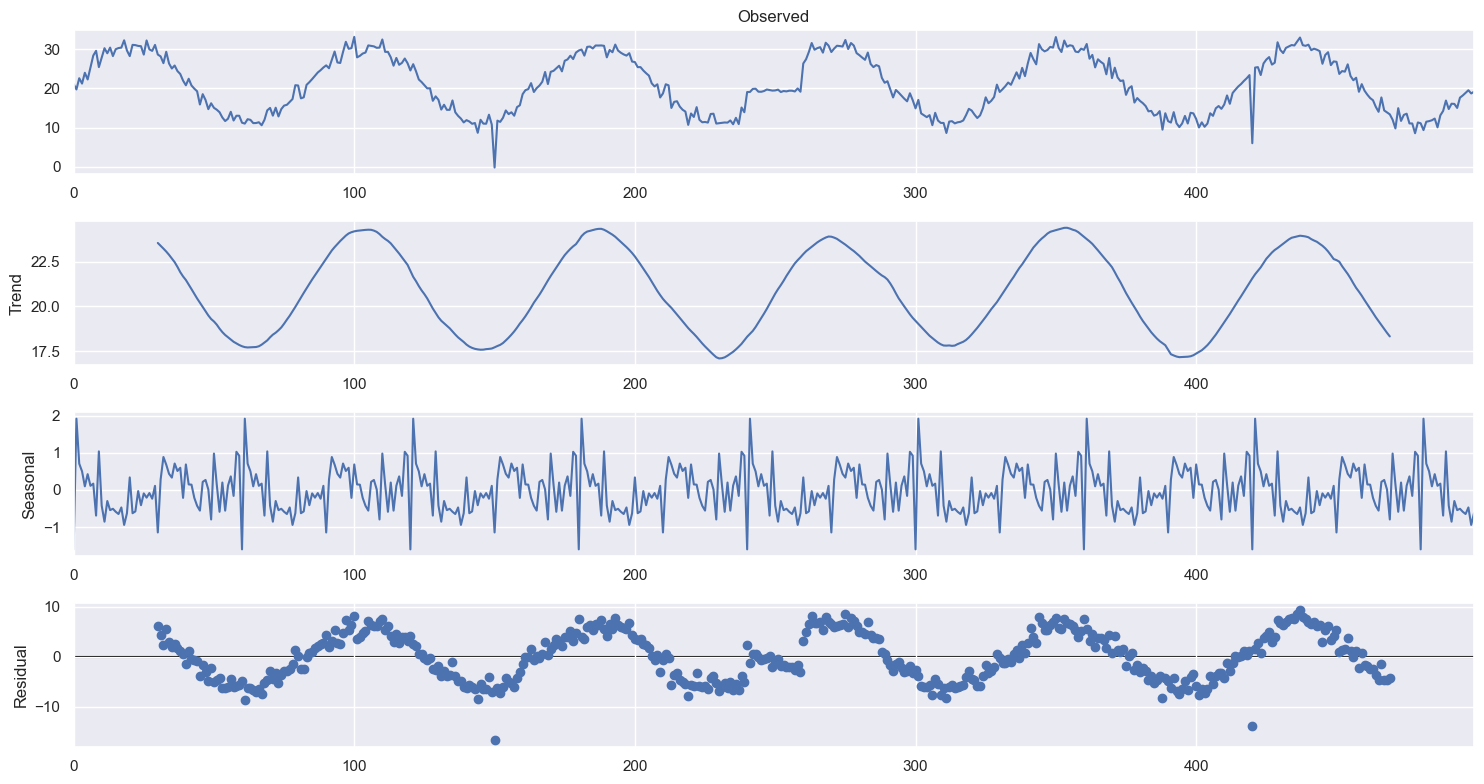

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data, model="additive", period=60)

result.plot()
plt.tight_layout()
plt.show()

In [7]:
result.resid[np.isnan(result.resid)] = 0
r = result.resid

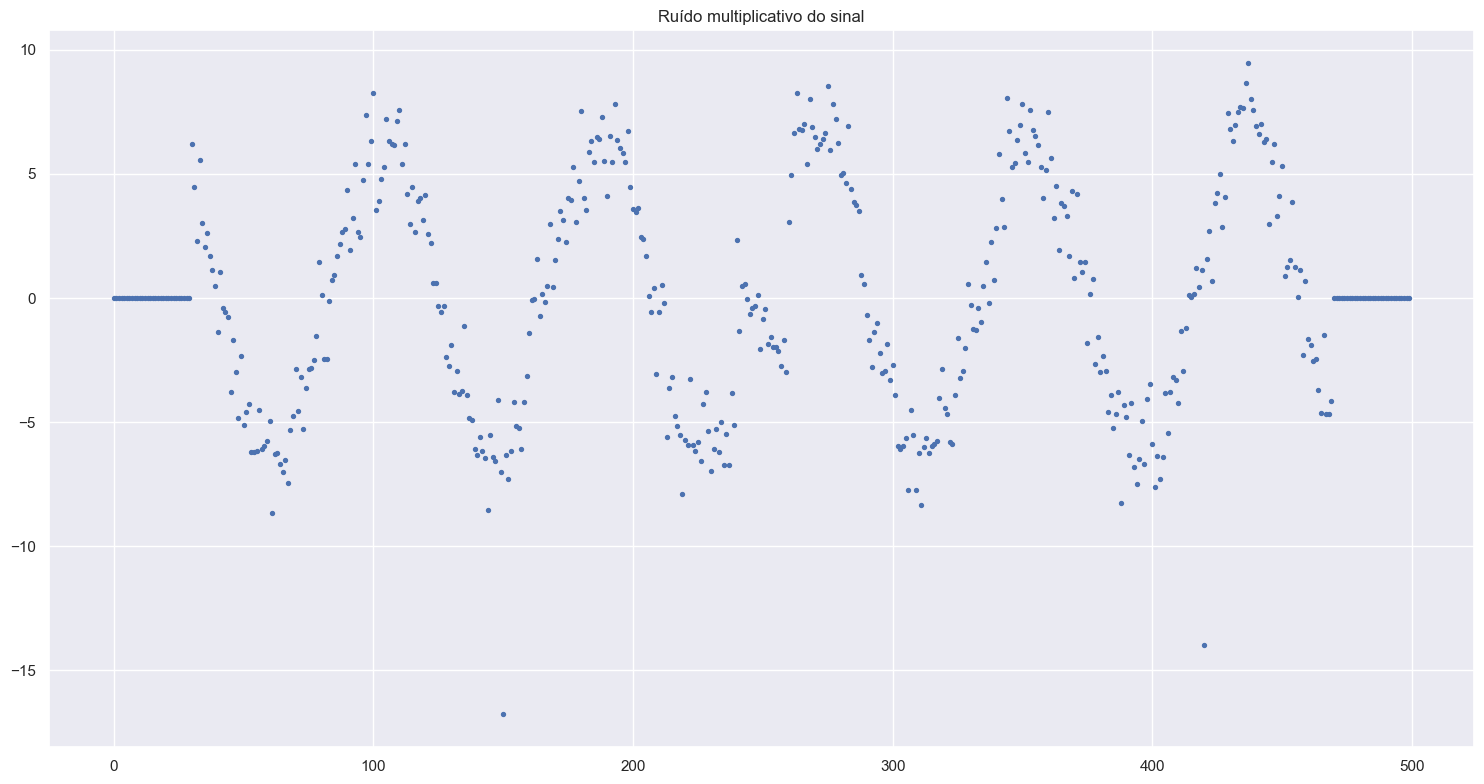

In [8]:
plt.scatter(range(r.shape[0]), r, s=8)
plt.title("Ruído multiplicativo do sinal")
plt.tight_layout()
plt.show()

#### Olhando a distribuição

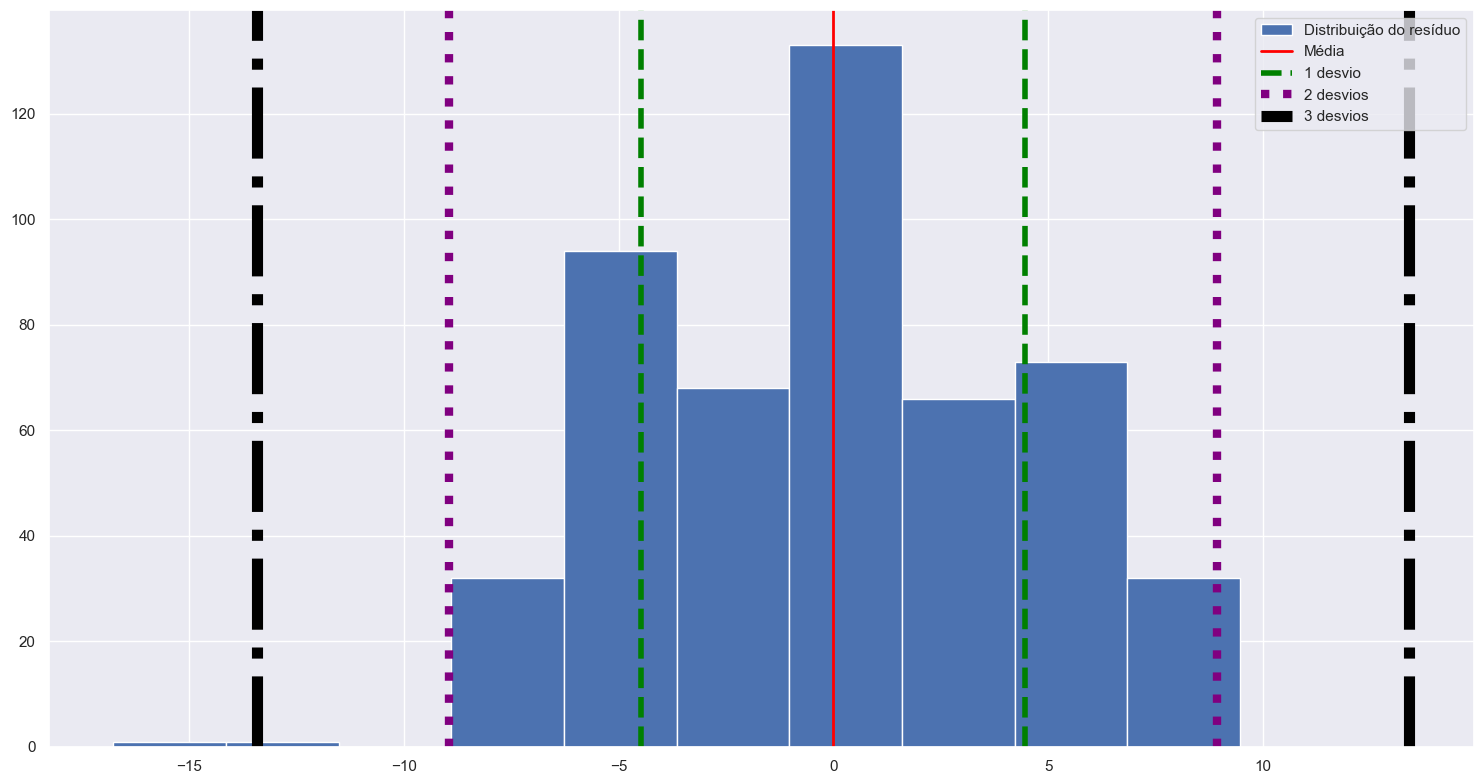

In [9]:
mu = np.mean(r)
sigma = np.std(r)

plt.hist(r, label="Distribuição do resíduo")
plt.axvline(mu, color="red", label="Média", linewidth=2)

plt.axvline(mu+sigma, color="green", label="1 desvio", linewidth=4, linestyle="--")
plt.axvline(mu-sigma, color="green", linewidth=4, linestyle="--")

plt.axvline(mu+2*sigma, color="purple", label="2 desvios", linewidth=6, linestyle=":")
plt.axvline(mu-2*sigma, color="purple", linewidth=6, linestyle=":")

plt.axvline(mu+3*sigma, color="black", label="3 desvios", linewidth=8, linestyle="-.")
plt.axvline(mu-3*sigma, color="black", linewidth=8, linestyle="-.")

plt.legend()
plt.tight_layout()
plt.show()

#### Criando o filtro

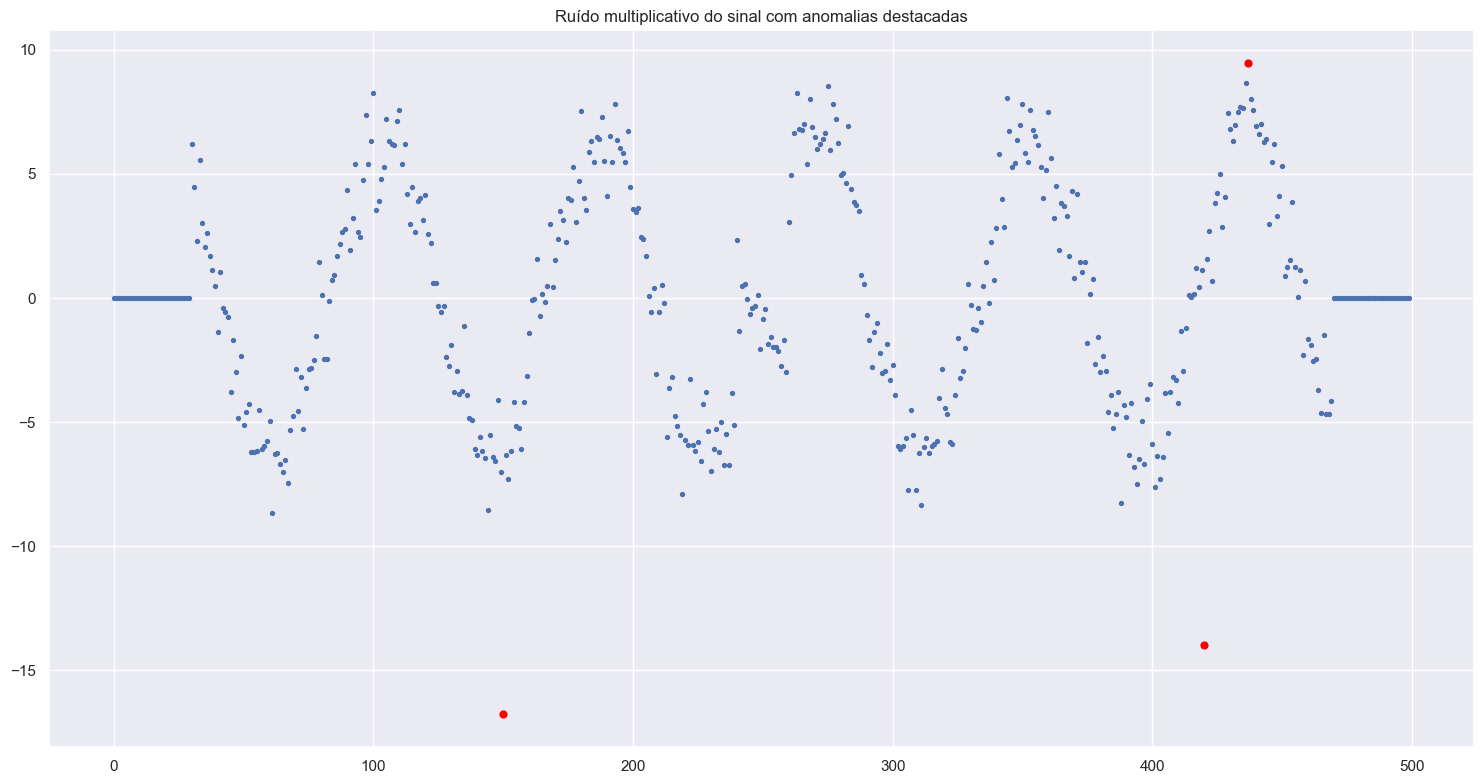

In [10]:
mean = np.mean(r)
tau = 2 * np.std(r)

test = np.abs(r-mean) > tau
idx = np.where(test.astype(int))
anomalies = r[test]

plt.scatter(range(r.shape[0]), r, s=8)
plt.scatter(idx, anomalies, s=24, color="red")
plt.title("Ruído multiplicativo do sinal com anomalias destacadas")
plt.tight_layout()
plt.show()

#### Visualizando possíveis anomalias diretamente nos dados

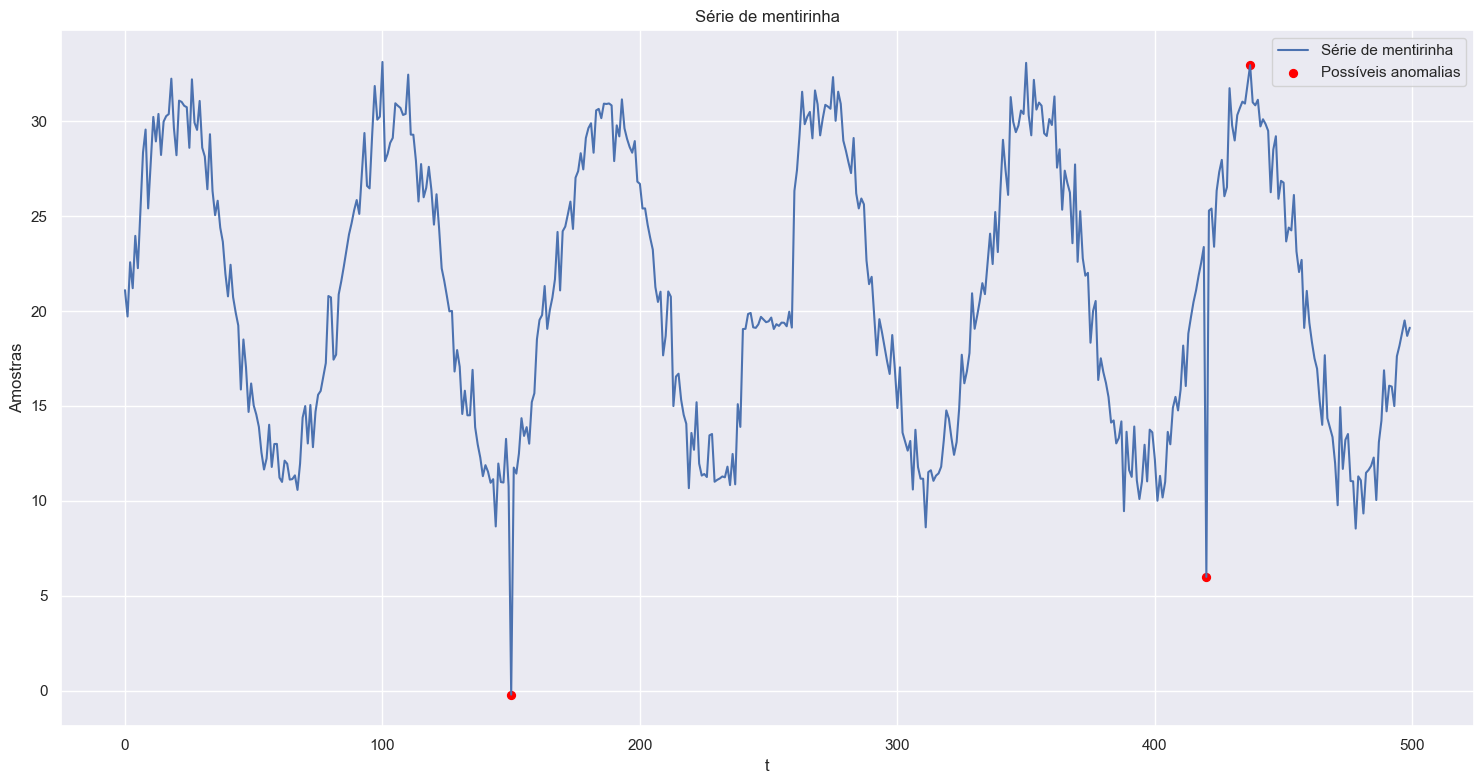

In [11]:
plt.plot(data, label="Série de mentirinha")
plt.scatter(idx, data[idx], s=32, color="red", label="Possíveis anomalias")
plt.title("Série de mentirinha")
plt.xlabel("t")
plt.ylabel("Amostras")
plt.legend()
plt.tight_layout()
plt.show()